In [1]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 57.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=ba9a537a138de91223e5d53913d67f8f65f50bc0573979539f2f2e07fd88f9b8
  Stored in directory: /home/ec2-user/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [43]:
import boto3
import pandas as pd; pd.set_option('display.max_column', 100)
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from skfuzzy.cluster import cmeans


s3= boto3.resource('s3')
bucket_name= 'morgangant-bata-445-bucket'
bucket= s3.Bucket(bucket_name)

file_key= 'customers.csv'

bucket_object= bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

#reading the datefile
customers = pd.read_csv(file_content_stream)
customers.head()

,ID,Visit_Time,Average_Expense,Sex,Age
0,1,3,5.7,0,10
1,2,5,14.5,0,27
2,3,16,33.5,0,32
3,4,5,15.9,0,30
4,5,16,24.9,0,23


In [44]:
## dropping ID
customers = customers.drop(columns = 'ID', axis =1)
customers.head()

,Visit_Time,Average_Expense,Sex,Age
0,3,5.7,0,10
1,5,14.5,0,27
2,16,33.5,0,32
3,5,15.9,0,30
4,16,24.9,0,23


In [45]:
## scaling 
scaler = MinMaxScaler()
customers[['Visit_Time_0_1', 'Average_Expense_0_1', 'Sex_0_1', 'Age_0_1']] = scaler.fit_transform(customers)
customers.head(10)

,Visit_Time,Average_Expense,Sex,Age,Visit_Time_0_1,Average_Expense_0_1,Sex_0_1,Age_0_1
0,3,5.7,0,10,0.117647,0.041096,0.0,0.051282
1,5,14.5,0,27,0.235294,0.342466,0.0,0.487179
2,16,33.5,0,32,0.882353,0.993151,0.0,0.615385
3,5,15.9,0,30,0.235294,0.390411,0.0,0.564103
4,16,24.9,0,23,0.882353,0.698630,0.0,0.384615
5,3,12.0,0,15,0.117647,0.256849,0.0,0.179487
6,12,28.5,0,33,0.647059,0.821918,0.0,0.641026
7,14,18.8,0,27,0.764706,0.489726,0.0,0.487179
8,6,23.8,0,16,0.294118,0.660959,0.0,0.205128
9,3,5.3,0,11,0.117647,0.027397,0.0,0.076923


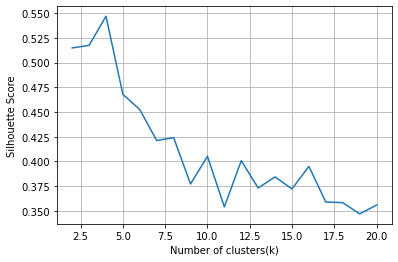

In [46]:
## defining a lists to store silhouette scores
silhouette = list()

for i in range (2,21):
    ##clustering the data into i clusters
    kmeans_md = KMeans(n_clusters = i, n_init = 20).fit(customers[['Visit_Time_0_1', 'Average_Expense_0_1', 'Sex_0_1', 'Age_0_1']])
    kmeans_md_labels = kmeans_md.labels_
    
    ##computing the silhouette score
    score = silhouette_score(customers[['Visit_Time_0_1', 'Average_Expense_0_1', 'Sex_0_1', 'Age_0_1']], kmeans_md_labels)
    silhouette.append(score)
    
##visualizing the results
import matplotlib.pyplot as plt

plt.plot(range(2,21), silhouette)
plt.xlabel('Number of clusters(k)')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show();

In [ ]:
#Would use 4 clusters

In [56]:
X = customers[['Visit_Time_0_1', 'Average_Expense_0_1', 'Sex_0_1', 'Age_0_1']]

##running fuzzy c-means with 4 clusters
fc, W, u0, d, jm, p, pc = cmeans(X.T, c = 4, m = 1.25, error = 1e-6, maxiter = 1000)

In [48]:
W[3]

array([8.05936589e-05, 1.58707475e-05, 4.84672933e-06, 1.22199700e-04,
       1.53503059e-08, 5.43733645e-08, 1.11264135e-06, 2.17056380e-06,
       2.33130381e-04, 7.53680333e-05, 1.04710706e-06, 1.18727337e-07,
       1.11264135e-06, 6.70547626e-07, 1.84588382e-05, 5.26241838e-05,
       2.68178238e-08, 4.24029837e-06, 3.12114280e-06, 4.53514675e-03,
       9.99999782e-01, 4.08165163e-03, 9.99977997e-01, 1.85328099e-03,
       4.60048547e-06, 9.99962545e-01, 9.99999631e-01, 5.58894015e-05,
       9.99999999e-01, 9.99542677e-01, 9.98686633e-01, 1.52536559e-07,
       5.85796445e-07, 2.85889874e-04, 9.99542677e-01, 9.99999714e-01,
       1.33364993e-04, 9.99888938e-01, 9.99999932e-01, 9.99999782e-01,
       9.99968832e-01, 9.99707184e-01, 9.99996391e-01, 9.60637007e-01,
       1.92259529e-05, 5.58894015e-05, 7.68046880e-01, 9.99989541e-01,
       9.98683099e-01, 1.85328099e-03, 9.99965612e-01, 1.11810427e-02,
       1.46871665e-04, 9.99196968e-01, 6.14148548e-01, 9.99995467e-01,
      

In [57]:
##creating the cluster column
customers['cluster'] = np.nan

##changing liklihoods to labels
customers['cluster'] = np.where(W[0] > .7, 1, customers['cluster'])
customers['cluster'] = np.where(W[1] > .7, 2, customers['cluster'])
customers['cluster'] = np.where(W[2] > .7, 3, customers['cluster'])
customers['cluster'] = np.where(W[3] > .7, 4, customers['cluster'])

In [58]:
## cluster 1
cluster_1 = customers[customers['cluster'] == 1].reset_index(drop = True)
cluster_1.describe()

#Cluster 1 has an average age of 19, is made up of mostly women, they spend about 14 on average and do not vist often. 

,Visit_Time,Average_Expense,Sex,Age,Visit_Time_0_1,Average_Expense_0_1,Sex_0_1,Age_0_1,cluster
count,15.000000,15.000000,15.0,15.000000,15.000000,15.000000,15.0,15.000000,15.0
mean,7.066667,13.653333,1.0,18.666667,0.356863,0.313470,1.0,0.273504,1.0
std,1.624221,3.822839,0.0,2.609506,0.095542,0.130919,0.0,0.066910,0.0
min,4.000000,10.200000,1.0,15.000000,0.176471,0.195205,1.0,0.179487,1.0
25%,6.500000,10.900000,1.0,17.000000,0.323529,0.219178,1.0,0.230769,1.0
50%,7.000000,12.000000,1.0,17.000000,0.352941,0.256849,1.0,0.230769,1.0
75%,8.000000,15.350000,1.0,21.000000,0.411765,0.371575,1.0,0.333333,1.0
max,10.000000,23.800000,1.0,23.000000,0.529412,0.660959,1.0,0.384615,1.0


In [59]:
## cluster 2
cluster_2 = customers[customers['cluster'] == 2].reset_index(drop = True)
cluster_2.describe()
#Cluster 2 has an average age of 31, and is made up of mostly women, they spend about 25 on average and do visit often. 

,Visit_Time,Average_Expense,Sex,Age,Visit_Time_0_1,Average_Expense_0_1,Sex_0_1,Age_0_1,cluster
count,16.000000,16.000000,16.0,16.000000,16.000000,16.000000,16.0,16.000000,16.0
mean,12.250000,25.362500,1.0,31.187500,0.661765,0.714469,1.0,0.594551,2.0
std,2.955221,4.336339,0.0,8.336416,0.173837,0.148505,0.0,0.213754,0.0
min,8.000000,17.800000,1.0,17.000000,0.411765,0.455479,1.0,0.230769,2.0
25%,10.000000,21.100000,1.0,26.000000,0.529412,0.568493,1.0,0.461538,2.0
50%,12.000000,25.450000,1.0,28.500000,0.647059,0.717466,1.0,0.525641,2.0
75%,13.250000,28.275000,1.0,36.750000,0.720588,0.814212,1.0,0.737179,2.0
max,18.000000,33.700000,1.0,47.000000,1.000000,1.000000,1.0,1.000000,2.0


In [52]:
## cluster 3
cluster_3 = customers[customers['cluster'] == 3].reset_index(drop = True)
cluster_3.describe()
#Cluster 3 has higher ages, an average of about 27, and is made up of mostly men, they spend about 26 on average and do visit often.

,Visit_Time,Average_Expense,Sex,Age,Visit_Time_0_1,Average_Expense_0_1,Sex_0_1,Age_0_1,cluster
count,8.000000,8.000000,8.0,8.000000,8.000000,8.000000,8.0,8.000000,8.0
mean,14.375000,25.587500,0.0,26.625000,0.786765,0.722175,0.0,0.477564,3.0
std,1.846812,4.647714,0.0,5.629958,0.108636,0.159168,0.0,0.144358,0.0
min,12.000000,18.800000,0.0,18.000000,0.647059,0.489726,0.0,0.256410,3.0
25%,13.500000,22.950000,0.0,22.750000,0.735294,0.631849,0.0,0.378205,3.0
50%,14.000000,25.400000,0.0,26.000000,0.764706,0.715753,0.0,0.461538,3.0
75%,16.000000,28.500000,0.0,32.250000,0.882353,0.821918,0.0,0.621795,3.0
max,17.000000,33.500000,0.0,33.000000,0.941176,0.993151,0.0,0.641026,3.0


In [54]:
## cluster 4
cluster_4 = customers[customers['cluster'] == 4].reset_index(drop = True)
cluster_4.describe()
#Cluster 4 has younger ages, averaging around 15, and is made up of mostly women, tey spend about 11 on average and do not vist often.

,Visit_Time,Average_Expense,Sex,Age,Visit_Time_0_1,Average_Expense_0_1,Sex_0_1,Age_0_1,cluster
count,24.000000,24.000000,24.0,24.000000,24.000000,24.000000,24.0,24.000000,24.0
mean,5.416667,10.591667,1.0,15.291667,0.259804,0.208619,1.0,0.186966,4.0
std,2.430185,4.474752,0.0,4.666990,0.142952,0.153245,0.0,0.119666,0.0
min,1.000000,4.500000,1.0,8.000000,0.000000,0.000000,1.0,0.000000,4.0
25%,3.000000,7.875000,1.0,11.750000,0.117647,0.115582,1.0,0.096154,4.0
50%,6.000000,10.900000,1.0,16.000000,0.294118,0.219178,1.0,0.205128,4.0
75%,7.000000,12.000000,1.0,17.500000,0.352941,0.256849,1.0,0.243590,4.0
max,10.000000,23.800000,1.0,23.000000,0.529412,0.660959,1.0,0.384615,4.0
